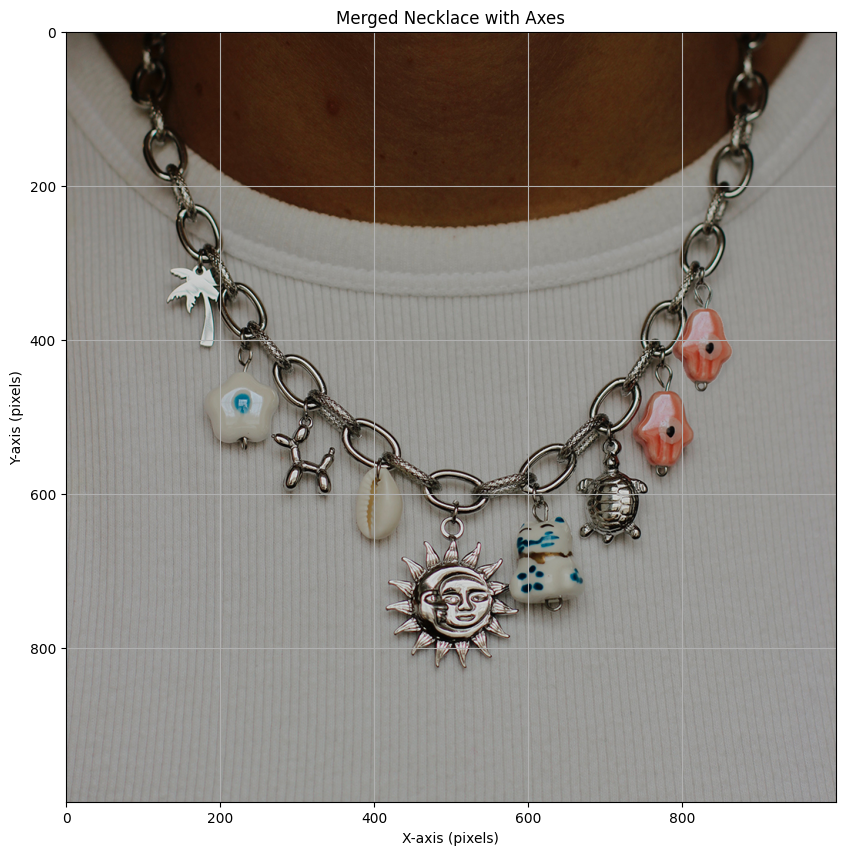

Successfully saved merged image to pics/output/final_necklace.png


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageFilter

def prepare_charm(charm_image, resize_factor=0.98):
    """
    Prepare a charm image by applying resizing, shadow, and visual effects
    
    Parameters:
    charm_image (PIL.Image): The charm image to process
    resize_factor (float): Factor to resize the charm (default 0.98)
    
    Returns:
    tuple: (processed charm image, shadow image)
    """
    # Convert to RGBA if not already
    charm = charm_image.convert('RGBA')
    
    # Resize the charm
    charm_width, charm_height = charm.size
    new_width = int(charm_width * resize_factor)
    new_height = int(charm_height * resize_factor)
    charm = charm.resize((new_width, new_height), Image.Resampling.LANCZOS)
    
    # Create shadow effect
    shadow = charm.copy()
    shadow_data = shadow.getdata()
    new_data = [(0, 0, 0, int(alpha * 0.25)) for (r, g, b, alpha) in shadow_data]
    shadow.putdata(new_data)
    shadow = shadow.filter(ImageFilter.GaussianBlur(radius=3.0))
    
    # Add slight blur
    charm = charm.filter(ImageFilter.GaussianBlur(radius=0.5))
    
    return charm, shadow

def merge_charm_with_necklace(necklace_path, charm_path, output_path, charm_positions=[(780, 300)]):
    """
    Merge one or more charm images with a necklace base image
    
    Parameters:
    necklace_path (str): Path to the base necklace image
    charm_path (str): Path to the charm image
    output_path (str): Path to save the final merged image
    charm_positions (list): List of (x,y) tuples for charm positions
    """
    try:
        # Open the base necklace image and the charm
        necklace = Image.open(necklace_path).convert('RGBA')
        charm_img = Image.open(charm_path).convert('RGBA')
        
        # Create a new blank image with transparency
        final_image = Image.new('RGBA', necklace.size, (0, 0, 0, 0))
        final_image.paste(necklace, (0, 0))
        
        # Add charms at each position
        for x_position, y_position in charm_positions:
            # Prepare the charm and its shadow
            charm, shadow = prepare_charm(charm_img)
            
            # Add shadow with offset
            shadow_x = x_position + 4
            shadow_y = y_position + 4
            final_image.paste(shadow, (shadow_x, shadow_y), shadow)
            
            # Add charm
            final_image.paste(charm, (x_position, y_position), charm)
        
        # Display with matplotlib
        final_array = np.array(final_image)
        plt.figure(figsize=(10, 10))
        plt.imshow(final_array)
        plt.axis('on')
        plt.grid(True)
        plt.title('Merged Necklace with Axes')
        plt.xlabel('X-axis (pixels)')
        plt.ylabel('Y-axis (pixels)')
        plt.show()
        
        # Save the final image
        final_image.save(output_path, 'PNG')
        print(f"Successfully saved merged image to {output_path}")
    except Exception as e:
        print(f"Error: {e}")

# Example usage
necklace_path = "pics/input/colliergrigriargent1-lespomponnettes.jpg"
charm_path = "pics/input/charm-1.png"
output_path = "pics/output/final_necklace.png"

# Create the merged necklace with a single charm
merge_charm_with_necklace(necklace_path, charm_path, output_path)

# Example with multiple charms at different positions
# merge_charm_with_necklace(necklace_path, charm_path, output_path, 
#                         charm_positions=[(780, 300), (680, 300), (880, 300)])
